#  FORDGOBIKE EXPLORATORY ANALYSIS
## by irene undiandeye

## Introduction
This data set includes information about individual rides made in fordgo bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
fordgo = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
print(fordgo.shape)

(183412, 16)


In [4]:
#change start and end time datatype, remove null values
fordgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
fordgo.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
fordgo['member_age'] = 2022-fordgo['member_birth_year']

In [7]:
fordgo['duration_min'] = fordgo['duration_sec']/60

In [8]:
fordgo

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0,869.750000
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,708.683333
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33.0,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48.0,26.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,26.0,8.000000
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,38.0,5.216667
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,32.0,2.350000
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,34.0,2.316667


In [9]:
fordgo['start_time'] = pd.to_datetime(fordgo['start_time'])
fordgo['end_time'] = pd.to_datetime(fordgo['end_time'])

In [10]:
fordgo['start_time_month_name']=fordgo['start_time'].dt.strftime('%B')
fordgo['start_time_weekday']=fordgo['start_time'].dt.strftime('%a')
fordgo['start_time_day']=fordgo['start_time'].dt.day.astype(int)
fordgo['start_hour']=fordgo['start_time'].dt.hour

In [11]:
fordgo.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,start_time_month_name,start_time_weekday,start_time_day,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,38.0,869.750000,February,Thu,28,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,NaN,708.683333,February,Thu,28,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,50.0,1030.900000,February,Thu,28,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,33.0,608.166667,February,Thu,28,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,48.0,26.416667,February,Thu,28,23


In [12]:
fordgo['start_station_id'] = fordgo['start_station_id'].astype(object)
fordgo['end_station_id'] = fordgo['end_station_id'].astype(object)
fordgo['bike_id'] = fordgo['bike_id'].astype(object)


In [13]:
fordgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [14]:
fordgo.to_csv('fordgo_master.csv')

In [15]:
df1= pd.read_csv('fordgo_master.csv')

In [16]:
df=df1.sort_values(by=['duration_sec'], ascending=False).head(50)



In [17]:
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,start_time_month_name,start_time_weekday,start_time_day,start_hour
101361,101361,85444,2019-02-13 17:59:55.124,2019-02-14 17:43:59.954,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,...,Subscriber,NaN,NaN,No,NaN,1424.066667,February,Wed,13,17
85465,85465,84548,2019-02-16 15:48:25.029,2019-02-17 15:17:33.080,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,...,Subscriber,1981.0,Male,No,41.0,1409.133333,February,Sat,16,15
153705,153705,83772,2019-02-05 12:44:54.286,2019-02-06 12:01:06.631,78.0,Folsom St at 9th St,37.773717,-122.411647,345.0,Hubbell St at 16th St,...,Customer,NaN,NaN,No,NaN,1396.200000,February,Tue,5,12
127999,127999,83519,2019-02-09 15:16:17.537,2019-02-10 14:28:17.270,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,...,Customer,1990.0,Male,No,32.0,1391.983333,February,Sat,9,15
112435,112435,83407,2019-02-11 16:25:33.069,2019-02-12 15:35:40.956,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,...,Customer,1988.0,Male,No,34.0,1390.116667,February,Mon,11,16


### Dataset structure.

The data set consist of 183412 entries with columns showing start time, duration, end time, start station id, start station name, start station latitude, start station latitude, end station id, end station name, end station latitude, end station latitude, bike id , user type, member birth year, member gender and bike_share_for_all_trip. 
The data set also consist of 9 columns with numeric data and 5 columns with string data

### The main feature(s) of interest in the dataset.

the following main features in the dataset are of interest to me
1. the popular start station and less popular start station
2. the user type with the highest frequency
3. the popular start 
4. the gender with the highest count


### features in the dataset that will help support the investigation.

I hope that the start station, end sation, gender, user type, start time and end time will help support my investigation 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

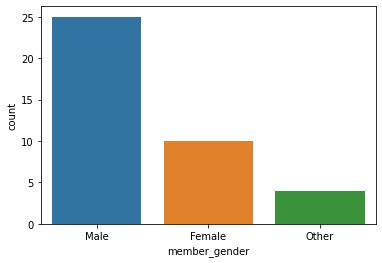

In [18]:
#showing the count of member's gender
sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender')
sb.title = 'the gender with the highest frequency'


This is a virtualisation to show the distribution of the gender of the top 50  users of forgo bike share sorted by their duration of use. from the bar chart above, we see that majority of the users are of the male gender followed by female and then the not spacified gender.

<AxesSubplot:xlabel='user_type', ylabel='count'>

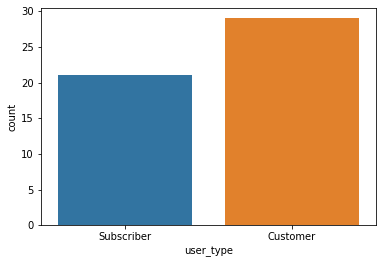

In [19]:
#showing the counts of user type
sb.countplot(data = df, x = 'user_type')

from the user type data ploted in the graph above we can see that fordgo bike system has more costumer that use the bike share without subscribtion than the subcribed members. from the sample size of 50 sorted in descending order by the duration of usage, 30 are unsubscribed customers while 20 are subscribers.

<AxesSubplot:xlabel='start_station_id', ylabel='count'>

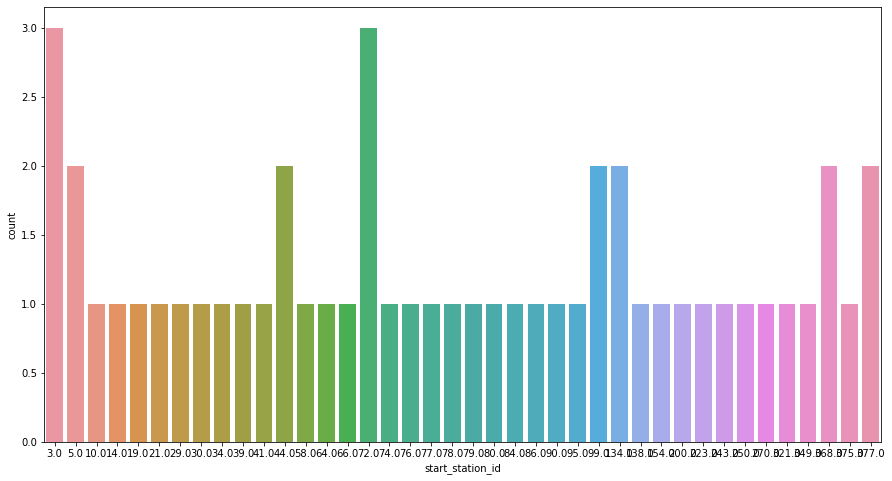

In [20]:
#showing the use frequency of start station
fig, ax = plt.subplots(figsize=(15, 8))
sb.countplot(data = df, x = 'start_station_id', ax=ax)


from the 50 samples, the most used start sation is station id 3.0 and 072 with 3 users each followed by station id 5.0, 0.44, 099, A34, B68 and B77.0 with 2 users each. the other 32 start stations in the chart all have 1 user each

<AxesSubplot:xlabel='end_station_id', ylabel='count'>

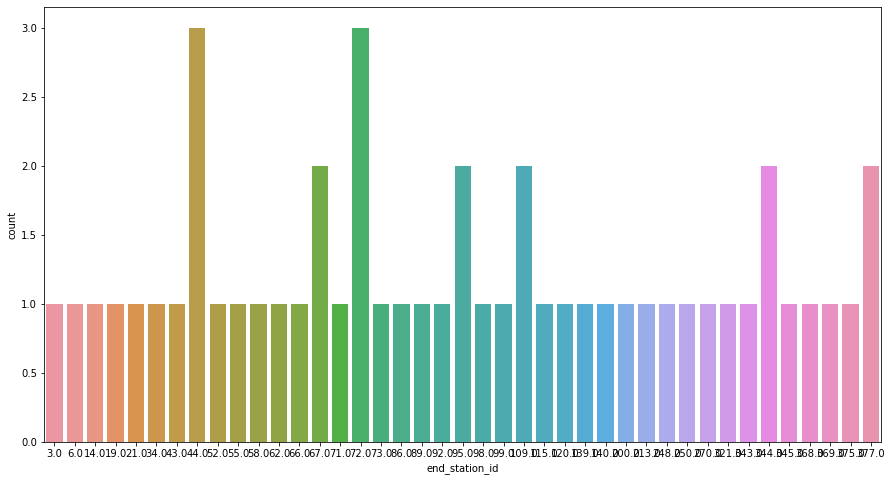

In [21]:
#showing the use frequency of start station
fig, ax = plt.subplots(figsize=(15, 8))
sb.countplot(data = df, x= 'end_station_id')

from the 50 samples, the most used end sation is station id 044 and 072 with 3 users each followed by station id 067, 092, A09, D44 and B77.0 with 2 users each. the other 34 end stations in the chart all have 1 user each

<AxesSubplot:xlabel='member_age', ylabel='count'>

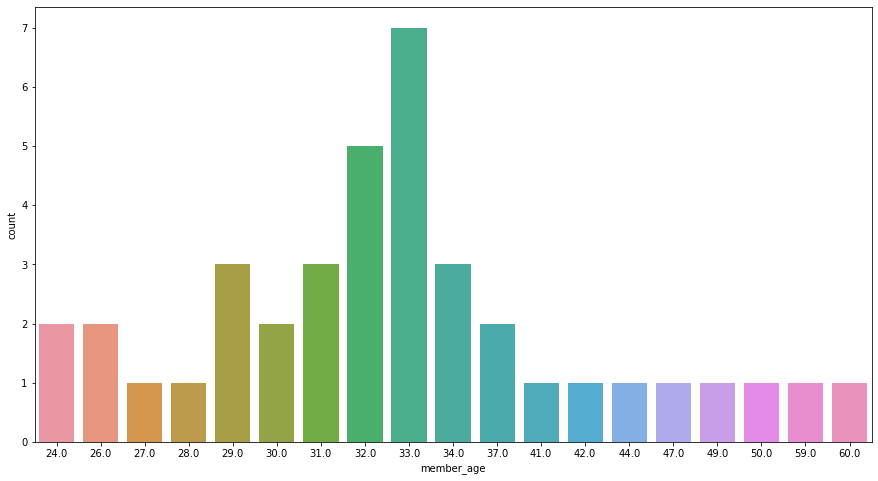

In [22]:
#showing the counts of member's age
fig, ax = plt.subplots(figsize=(15, 8))
sb.countplot(data = df, x= 'member_age')

from the member age chart the users of fordgo bike share range from age 24 to age 60 with users in the age of 33 with the highest frequency of 7, followed by user in the age of 32 with the counts of 5, user in the age of 29, 31, and 34 with the counts of 3 each, users in the age of 24, 26, 30, and 37 with the counts of 2 and finally the users in the age of 27, 28, 41, 42, 47, 49, 50 and 60 with the count of 1 each.

Text(0.5, 0.98, 'fordgo bike ride counts by hour')

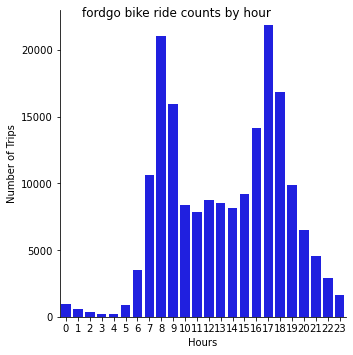

In [23]:
#This code will calculate the number of rides in each hour of the day and disply it in a chart 
hourly_chart = sb.catplot(data=df1, x='start_hour', kind='count' , color = 'Blue')
hourly_chart.set_axis_labels("Hours", "Number of Trips")
hourly_chart.fig.suptitle('fordgo bike ride counts by hour')

From the chart above we can see that the highest number of rides has occured between 8 in the morning and 5 in the evening. Which is understandably so since most people commute to work at 8 a.m. and back at 5 p.m.

Text(0.5, 0.98, 'fordgo bike ride trip counts by day of the day')

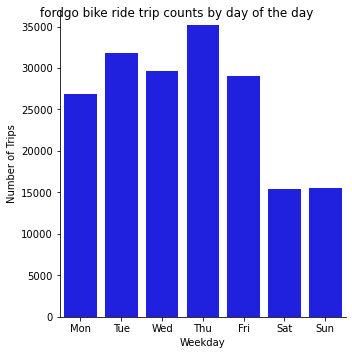

In [24]:
#This code will calculate the number of rides in day of the week and disply it in a chart 

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

weekday_chart = sb.catplot(data=df1, x='start_time_weekday', kind='count', color = "Blue", order = weekday)
weekday_chart.set_axis_labels("Weekday", "Number of Trips")
weekday_chart.fig.suptitle('fordgo bike ride trip counts by day of the day')

From the chart above we can see that the highest number of rides has occured between mondays and fridays . again this is not suprising as most people commute to work on the weekdays and a few on weekend.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0, 0.5, 'trip duration in minutes')

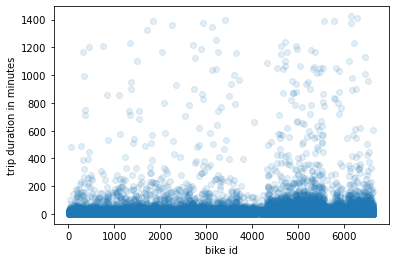

In [25]:
# a scatter plot showing the relationship between bike id and duration
plt.scatter(data = df1, x = 'bike_id', y = 'duration_min', alpha = 1/8)
plt.xlabel('bike id')
plt.ylabel('trip duration in minutes')

from the scatter plot we see that the is a correlation between the bike id and duration up to about 200 munite after with the the is no more correlation.

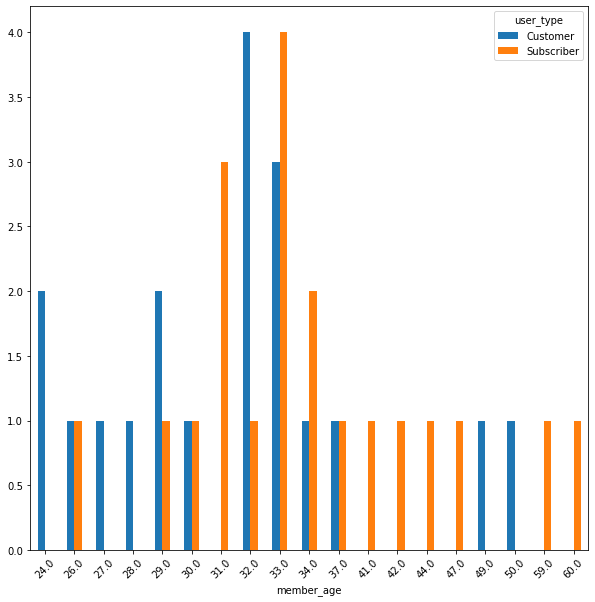

In [28]:
# chart showing the distribution of user type and member's age
df_new = df.groupby('member_age')['user_type'].value_counts().unstack().plot.bar(figsize=(10, 10))
plt.xticks(rotation=45);

the chart above shows the members age and their corresponding user type counts. from the graph above we can see that the subscribe costumers are mostly in the age of 31, 33, 34, 41, 42, 44, 47, 59 and 60  and most of the user in the age of 24, 27, 29, 32, 49 and 50 while users in the age of 26, 30, 37, where equally distributed between subscibers and customers.

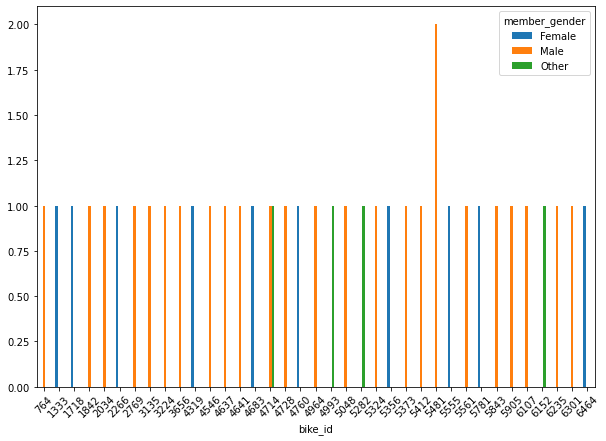

In [30]:
# chart showing the distribution of bike id and member's gender
df.groupby('bike_id')['member_gender'].value_counts().unstack().plot.bar(figsize=(10,7))
plt.xticks(rotation=45);

the bikes had at 1 user of either male, female or other who use them except for bike id 4714 who had 1 male and 1 user in the other category and bike id 5481 which had 2 male users

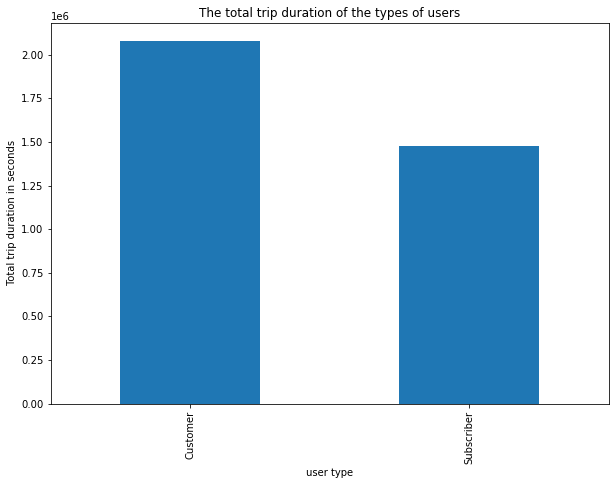

In [31]:
# chart showing the distribution of user type and trip duration minutes
df.groupby('user_type')['duration_sec'].sum().plot.bar(figsize=(10,7))
plt.xlabel('user type')
plt.ylabel(' Total trip duration in seconds')
plt.title('The total trip duration of the types of users');


from the chart wee see that highest total duration within the period covered by the dataset where the unsubscribers with a total of 200000 minutes then the subscribers had a total trip duration of about 150000 minutes

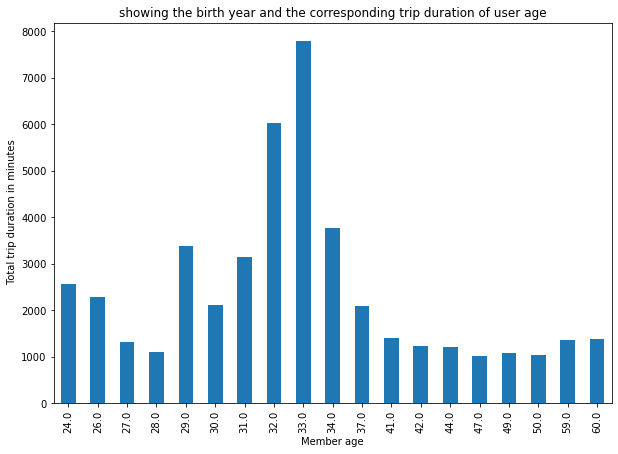

In [32]:
# chart showing the distribution of trip duration and member's age
df.groupby('member_age')['duration_min'].sum().plot.bar(figsize=(10,7))
plt.xlabel('Member age')
plt.ylabel(' Total trip duration in minutes')
plt.title('showing the birth year and the corresponding trip duration of user age')

plt.show();

the users that uses then bike for the longest time with a trip duration of about 8000 minutes are within the age of 33 followed by users in the age of 32 with a trip duration of 6000 minutes and the other users in the ages of 24, 26, 27, 28, 29, 30, 31, 34, 37, 41, 42, 47, 49, 50, 59 and 60 had a trip duration between 2500 and 4000.

### Some of the relationships observed in this part of the investigation.

 looking at the dataset, we can summarise that the subscribers trips are shorter than that of the customers. And that the subscribed costumers are mostly in the age of 31, 33, 34, 41, 42, 44, 47, 59 and 60 and most of the user in the age of 24, 27, 29, 32, 49 and 50 while users in the age of 26, 30, 37, where equally distributed between subscibers and customers..


## Multivariate Exploration

In [33]:
#This code is for creating new column called "age_group" and will catagorise the users based on thier age
df1['age_interval'] = df1['member_age'].apply(lambda x: 'Teenager' if 12<x<=19
                                                  else 'Young Adult' if 19<x<=30
                                                  else 'Adult' if 30<x<=49
                                                  else 'Senior' if 49<x
                                                           else x)

In [34]:

df1.age_interval.value_counts()

Adult          105227
Young Adult     48227
Senior          21693
Name: age_interval, dtype: int64

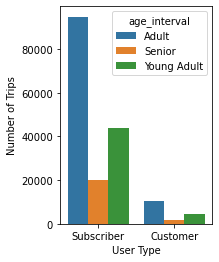

In [35]:
#showing the numbers of each group age and each user type in a chartplt.figure(figsize = [30, 5])
plt.subplot(1, 2, 1)
age_chart = sb.countplot(data=df1, x="user_type", hue="age_interval", 
                          order=df1.user_type.value_counts().index)
age_chart.set_xlabel('User Type')
age_chart.set_ylabel('Number of Trips');

From the chart above we can see, both user types have the same trend. Adult subscribers have the most rides also the same with the adult customers. In addation, we can see that the Teenagers are the least group for both types. On the other hand, we can note that the gap between adult and young adult is diffrent between the two types. As for the subscribes, we see that almost 2:1 between the two group. However, for the customers the gap is way less and it almost equal.

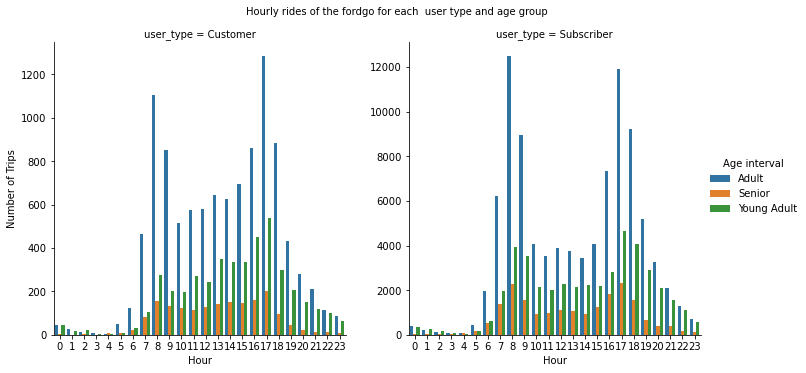

In [37]:
#showing the number of rides in each hour of the day for each user type and age group 
hourly_chart= sb.catplot(data=df1, x='start_hour', col="user_type", hue='age_interval',
                              kind='count', sharey = False)
hourly_chart.set_axis_labels("Hour", "Number of Trips")
hourly_chart._legend.set_title('Age interval')
#hourly_chart.set_titles("{col_name}")
hourly_chart.fig.suptitle('Hourly rides of the fordgo for each  user type and age group', y=1.03,fontsize=10);

From the chart we can see that the Adult are domanating on both customer and subscriber. Also, the age group is follwong the overall trend that we have saw on the previous section, where on the “prime time” of both type we see that the adult has the most rides among other groups. On the other hand, if we examined the “off hours” for both types we see that the young adult group has the majorty. For example after 7 p.m. on the customer type we see that the number of rides for youg adult is higher than other groups. However, for the subscribers, the trend changes after 8 p.m. and the young adult group becomes the highest.

## SUMMARY
The member age column shows that most of the users are adult(30 to 49 years old) for both user types (customer and subscribers). In addition, looking at the hourly usage of fordgo bike share system, we see that adult follow the overall observiation. Most of the trips are at the beginning of the business day and at the end of the day (ie, between 8am and 5pm) and also the usage is more from mondays to fridays.

The variable interactions that got my interest are at fellows:
1. The gap between the adult and young adult in both subscribed and customer user type. The gap between the adult riders and young adult riders for the subscriber is almost 2:1. On the other hand, the gap between the two group for the customer almost equal. 
2. The adult were always have the highr number of rides among other goups. However, if we examined the late hours of the day, we can see that the number of rides for the young adults becomes higher than the adult riders. The reason behind it could be that young adult (between 19 and 30 years old) usually go out late night more than other groups.

## CONCLUSION
the dataset had some data tidiness and quality issue. the followin wrangling steps were taken to solve these issues
1. change wrong data types
2. change the duration column(in seconds) to minutes
3. create a column from member birth year called member's age carrying their age not their birth year as the member's birth year column 
4. split the start time column to start day of the week and start hour of the day

